# 🚗 Task 1: EDA Analysis for AlphaCare Insurance Solutions

This notebook performs exploratory data analysis (EDA) on car insurance policy data to uncover patterns in risk, profitability, and customer behavior.

---


In [28]:
# 1.Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [33]:
# 2.Load Data
data_path = "../data/MachineLearningRating_v3.txt"
df = pd.read_csv(data_path, sep="|", low_memory=False)


In [30]:
# 3.Basic Overview
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [ ]:
# 4.Data Cleaning and Feature Engineering
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce', format='%Y-%m')
df = df[df['TotalPremium'] > 0].copy()
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

In [ ]:
# 5.Descriptive Statistics
numerical_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured']
desc_stats = df[numerical_cols].describe().T
desc_stats['variance'] = df[numerical_cols].var()
desc_stats['cv'] = df[numerical_cols].std() / df[numerical_cols].mean()
desc_stats

,count,mean,std,min,25%,50%,75%,max,variance,cv
TotalPremium,618176.0,100.203033,2.862361e+02,0.000011,2.631316,7.281228,78.947368,6.528260e+04,8.193110e+04,2.856561
TotalClaims,618176.0,100.413265,2.989981e+03,-12002.412281,0.000000,0.000000,0.000000,3.930921e+05,8.939985e+06,29.776751
CustomValueEstimate,156100.0,231256.334107,6.674016e+05,20000.000000,135600.000000,220000.000000,280000.000000,2.655000e+07,4.454249e+11,2.885982
SumInsured,618176.0,609826.858732,1.515211e+06,0.010000,5000.000000,7500.000000,250500.000000,1.263620e+07,2.295865e+12,2.484658


In [ ]:
# 6.Missing Values
df.isnull().sum().sort_values(ascending=False)

TransactionMonth            618176
NumberOfVehiclesInFleet     618176
CrossBorder                 617922
CustomValueEstimate         462076
Rebuilt                     378871
Converted                   378871
WrittenOff                  378871
Bank                         82536
NewVehicle                   60634
AccountType                  30734
MaritalStatus                 5071
Gender                        4621
make                           218
VehicleIntroDate               218
NumberOfDoors                  218
kilowatts                      218
cubiccapacity                  218
Cylinders                      218
Model                          218
bodytype                       218
VehicleType                    218
mmcode                         218
CapitalOutstanding               2
TermFrequency                    0
CalculatedPremiumPerTerm         0
ExcessSelected                   0
CoverCategory                    0
CoverType                        0
SumInsured          

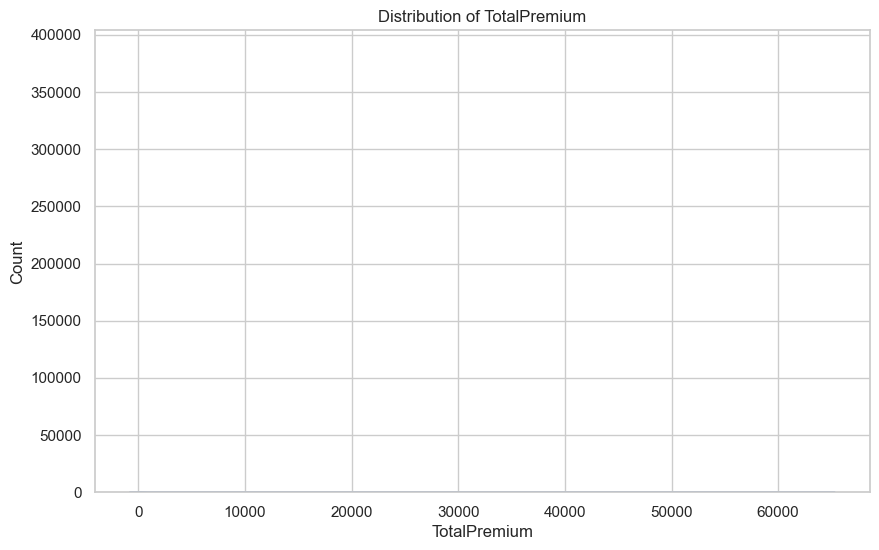

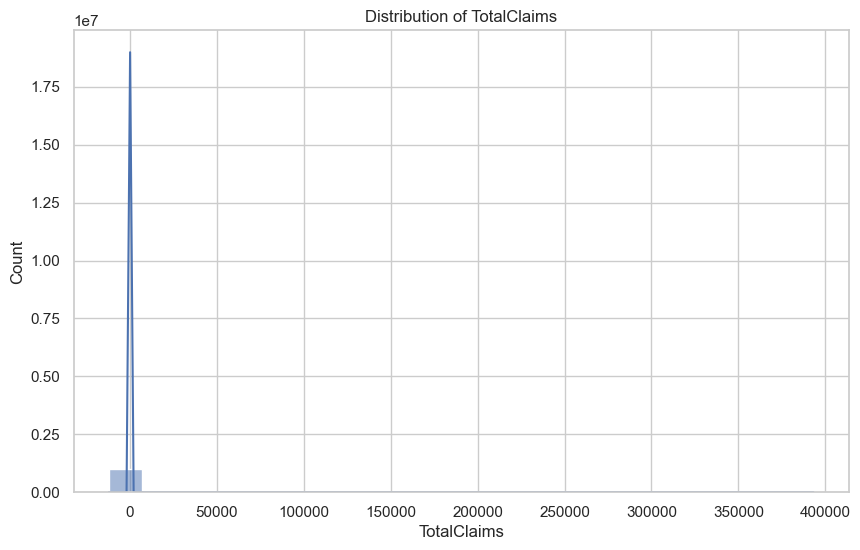

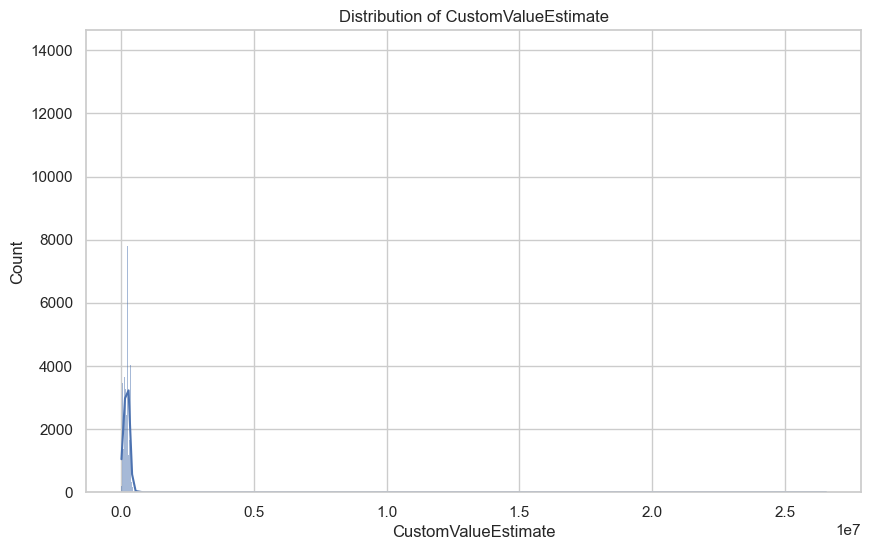

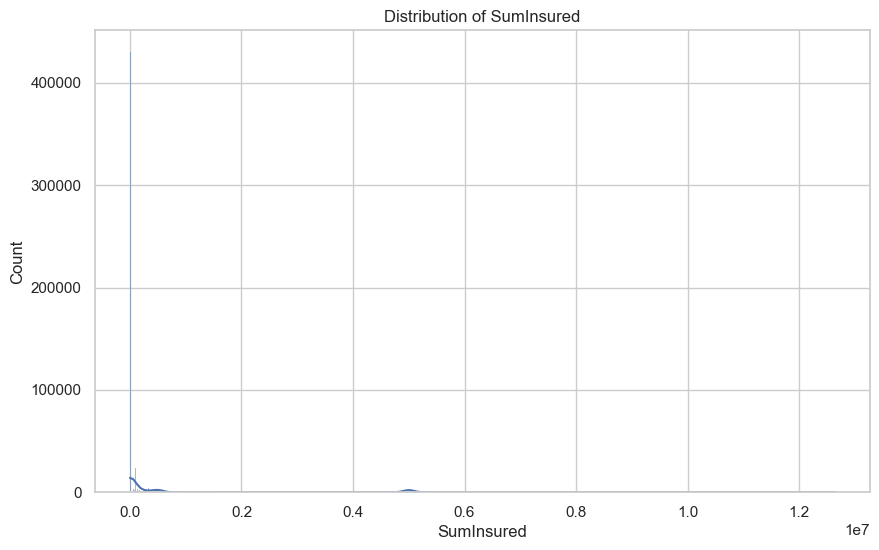

In [32]:
# 7.Univariate Distributions – Numerical Columns
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

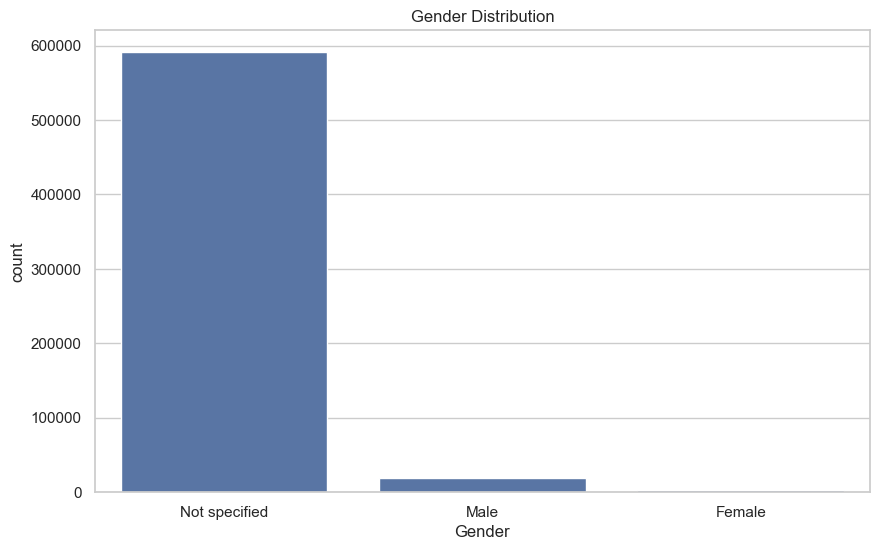

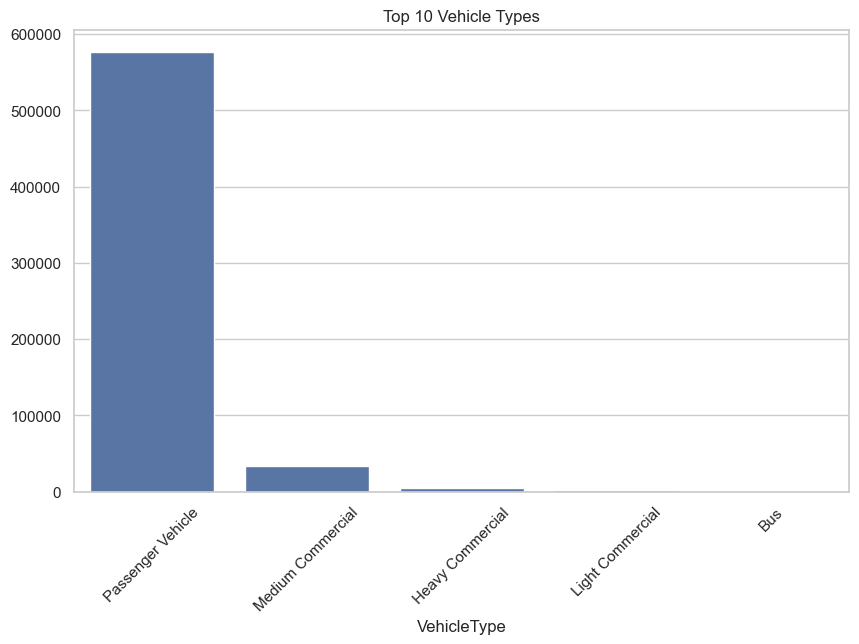

In [ ]:
# 8.Univariate Distributions – Categorical Columns
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()

top_vehicle_types = df['VehicleType'].value_counts().head(10)
sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values)
plt.title("Top 10 Vehicle Types")
plt.xticks(rotation=45)
plt.show()


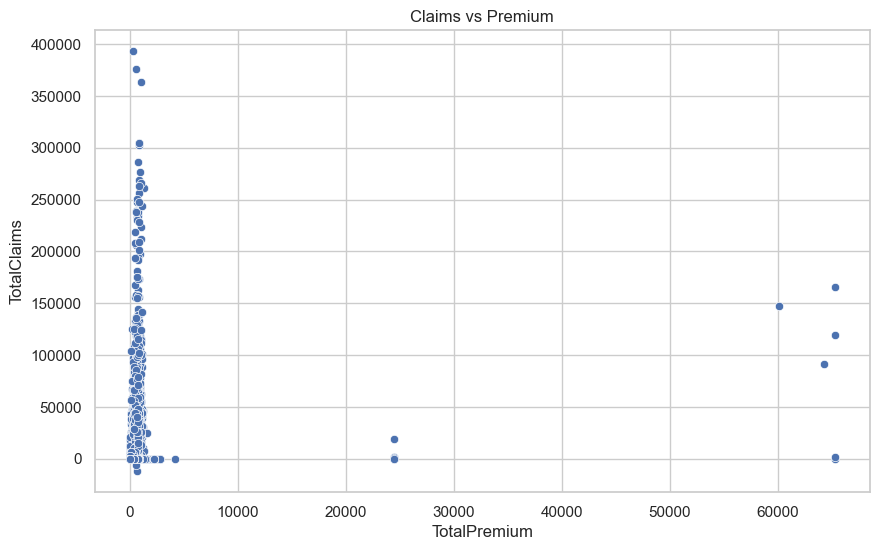

In [ ]:
# 9.Bivariate Analysis – Claims vs Premium
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims')
plt.title("Claims vs Premium")
plt.show()


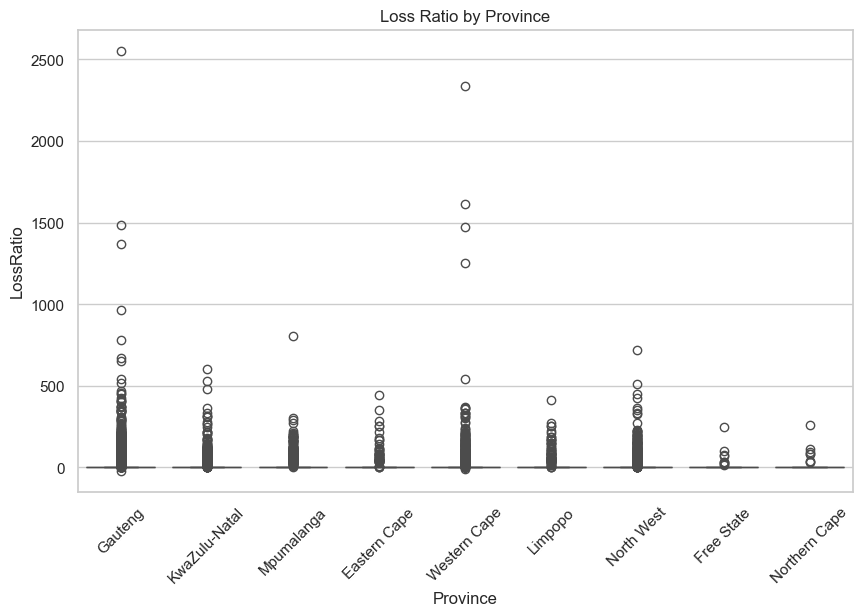

In [ ]:
# 10.Loss Ratio by Province
sns.boxplot(data=df, x='Province', y='LossRatio')
plt.title("Loss Ratio by Province")
plt.xticks(rotation=45)
plt.show()


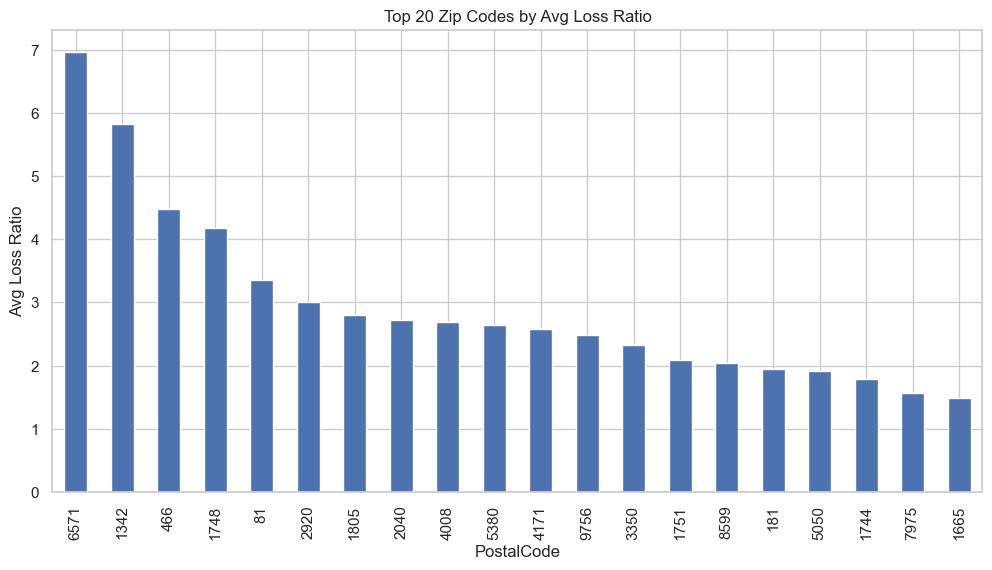

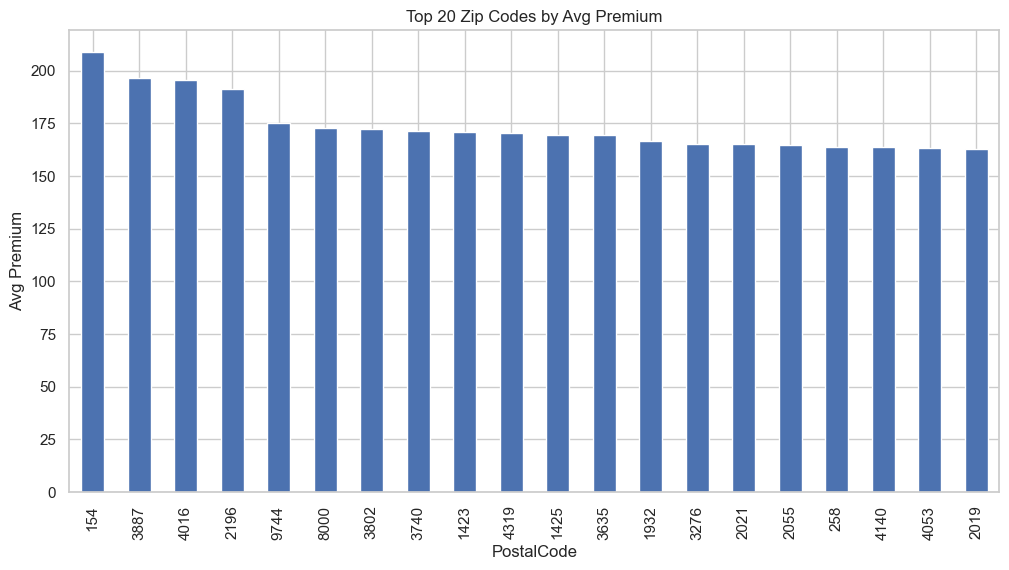

In [ ]:
# 11.Zip Code Analysis (Loss Ratio and Premium)
zip_loss = df.groupby('PostalCode')['LossRatio'].mean().sort_values(ascending=False).head(20)
zip_loss.plot(kind='bar', title='Top 20 Zip Codes by Avg Loss Ratio', figsize=(12, 6))
plt.ylabel("Avg Loss Ratio")
plt.show()

zip_premium = df.groupby('PostalCode')['TotalPremium'].mean().sort_values(ascending=False).head(20)
zip_premium.plot(kind='bar', title='Top 20 Zip Codes by Avg Premium', figsize=(12, 6))
plt.ylabel("Avg Premium")
plt.show()


        Month  TotalPremium   TotalClaims  ClaimCount  AvgClaimSeverity
0  2013-10-01  3.710635e+02  0.000000e+00           0          0.000000
1  2013-11-01  2.130747e+04  5.058508e+04           2      25292.539474
2  2013-12-01  4.248475e+04  9.283386e+03           3       3094.461988
3  2014-01-01  5.408520e+04  1.243686e+04           2       6218.429825
4  2014-02-01  6.078844e+04  6.298931e+04           6      10498.217836
5  2014-03-01  9.857719e+04  3.227850e+05          12      26898.751798
6  2014-04-01  2.342743e+05  3.068636e+05          20      15343.179605
7  2014-05-01  3.759117e+05  5.180427e+05          28      18513.253095
8  2014-06-01  4.862194e+05  5.045364e+05          28      18019.157018
9  2014-07-01  6.092661e+05  4.289822e+05          27      15911.766699
10 2014-08-01  9.074381e+05  6.934197e+05          51      13831.806330
11 2014-09-01  1.237522e+06  9.089024e+05          48      19054.024346
12 2014-10-01  1.670355e+06  1.764693e+06          93      18975

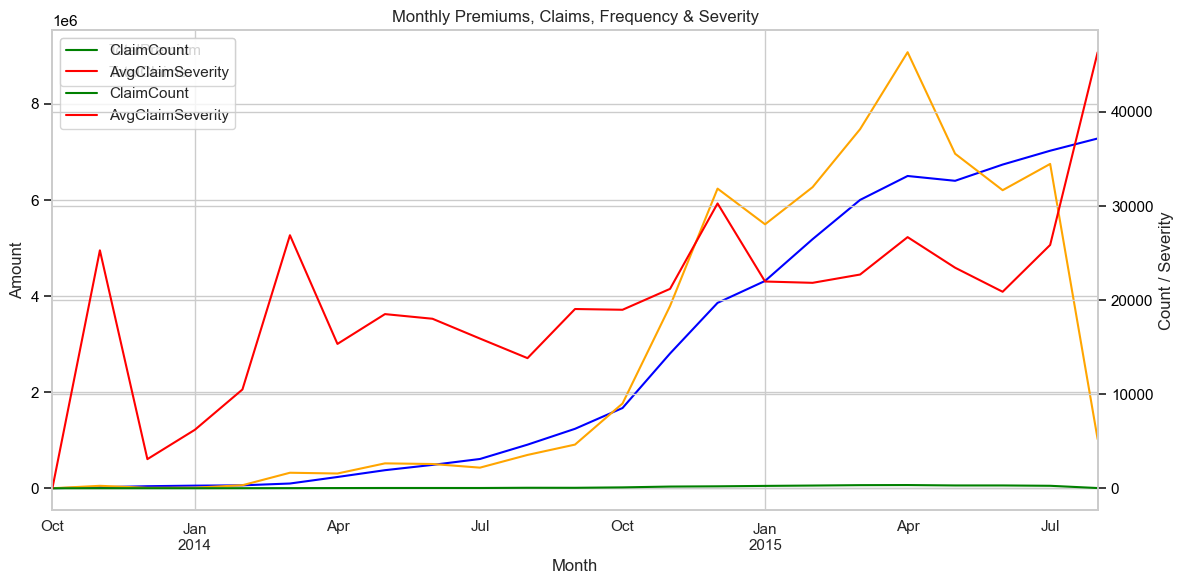

In [ ]:
# 12.Monthly Trends – Claim Frequency & Severity

# Load your data first (modify path if needed)
data_path = "../data/MachineLearningRating_v3.txt"
df = pd.read_csv(data_path, sep="|", low_memory=False)

# Convert TransactionMonth to datetime, handle errors gracefully
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['TransactionMonth'])

# Create Month column for grouping
df['Month'] = df['TransactionMonth'].dt.to_period('M').dt.to_timestamp()

# Aggregate monthly data
monthly_summary = df.groupby('Month').agg({
    'TotalPremium': 'sum',
    'TotalClaims': ['sum', lambda x: (x > 0).sum(), lambda x: x[x > 0].mean()]
})
monthly_summary.columns = ['TotalPremium', 'TotalClaims', 'ClaimCount', 'AvgClaimSeverity']
monthly_summary = monthly_summary.reset_index()

# Fill NaNs with zero to avoid plot issues
monthly_summary['AvgClaimSeverity'] = monthly_summary['AvgClaimSeverity'].fillna(0)
monthly_summary['ClaimCount'] = monthly_summary['ClaimCount'].fillna(0)

print(monthly_summary)  # Verify data

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

monthly_summary.set_index('Month')[['TotalPremium', 'TotalClaims']].plot(ax=ax1, color=['blue', 'orange'])
ax1.set_ylabel('Amount')
ax1.set_xlabel('Month')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
monthly_summary.set_index('Month')[['ClaimCount', 'AvgClaimSeverity']].plot(ax=ax2, color=['green', 'red'])
ax2.set_ylabel('Count / Severity')
ax2.tick_params(axis='y', labelcolor='black')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Monthly Premiums, Claims, Frequency & Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


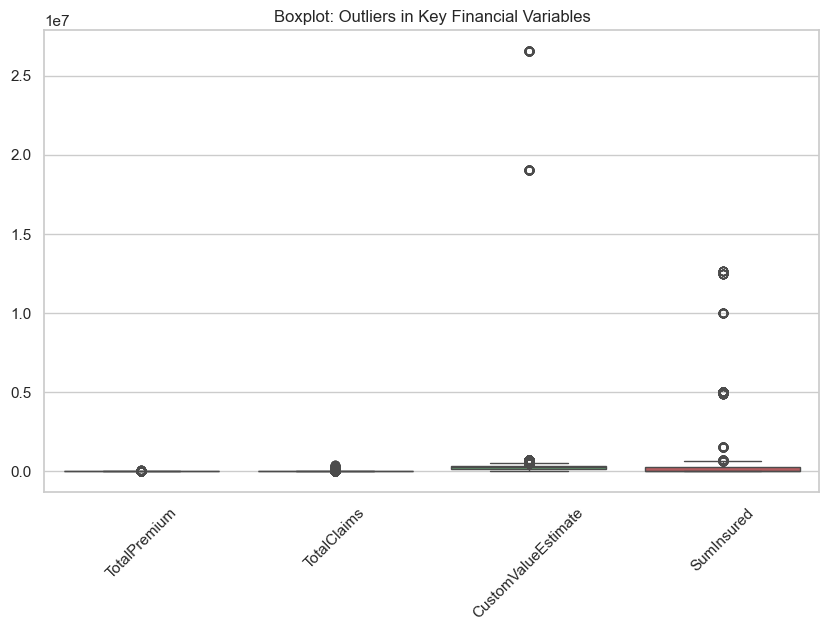

In [27]:
# 13.Outlier Detection
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot: Outliers in Key Financial Variables")
plt.xticks(rotation=45)
plt.show()


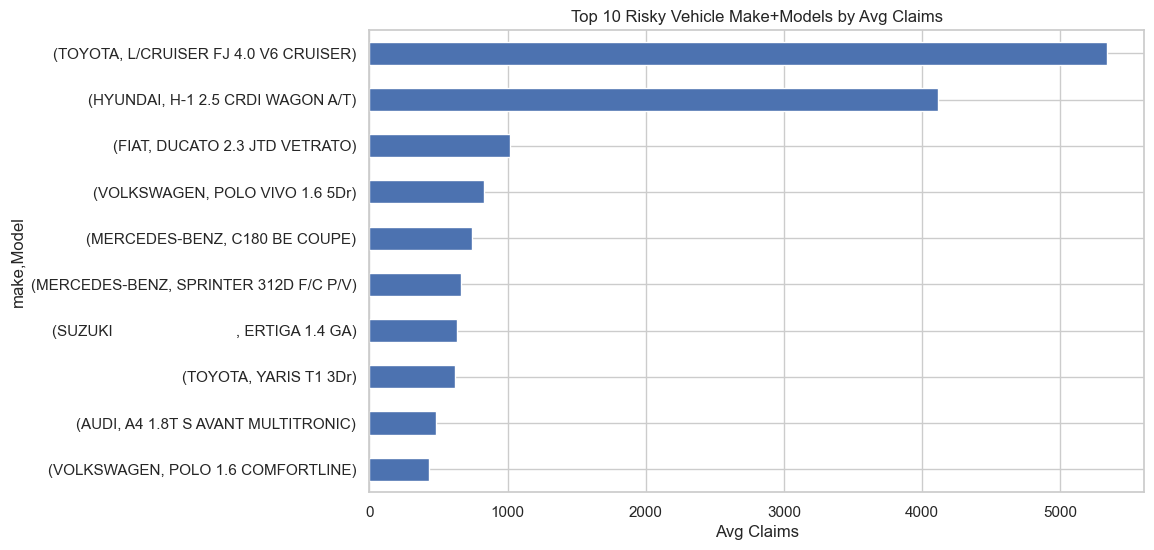

In [25]:
# 14.Risky Vehicle Make + Model
# Correct column names from your dataframe
make_col = 'make'
model_col = 'Model'

# Check if these columns exist in df
if make_col in df.columns and model_col in df.columns:
    # Calculate average TotalClaims by Make and Model
    top_models = (
        df.groupby([make_col, model_col])['TotalClaims']
          .mean()
          .dropna()
          .sort_values(ascending=False)
          .head(10)
    )
    
    # Plot horizontal bar chart
    top_models.plot(kind='barh', title='Top 10 Risky Vehicle Make+Models by Avg Claims')
    plt.xlabel("Avg Claims")
    plt.gca().invert_yaxis()  # Highest risk on top
    plt.show()
else:
    print(f"Columns '{make_col}' and/or '{model_col}' not found in dataframe.")


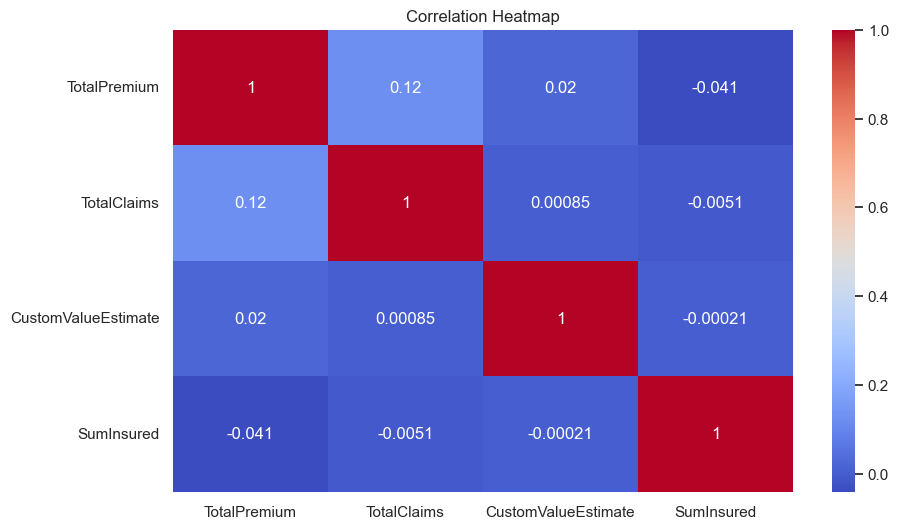

In [26]:
# 15.Correlation Heatmap
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()